In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.spatial.distance import euclidean as eu
import math

In [3]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [4]:
data = C_data[0]
data

,T,LX,LY,RX,RY
0,0.0,0.00000,0.00000,0.00000,0.00000
1,20.0,0.65535,-0.00001,0.65536,-0.65536
2,40.0,0.65534,-0.00001,0.65536,-0.65536
3,60.0,0.65534,-0.00001,0.65535,-0.65536
4,80.0,0.65534,-0.00001,0.65534,0.00000
...,...,...,...,...,...
1494,29880.0,103.54872,37.35520,104.85945,36.69984
1495,29900.0,105.51480,36.04447,106.17018,32.76765
1496,29920.0,107.48088,27.52472,108.79159,14.41743
1497,29940.0,108.13612,-16.38473,102.89310,-78.64416


In [5]:
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

In [6]:
D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [20]:
trial = C_new[1]

In [21]:
x = trial['X']
y = trial['Y']
t = trial['T']

In [22]:
z=[]
for i in range(0,x.size):
    z.append(complex(x[i],y[i]))

In [23]:
Z = np.fft.fft(z)

C:\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


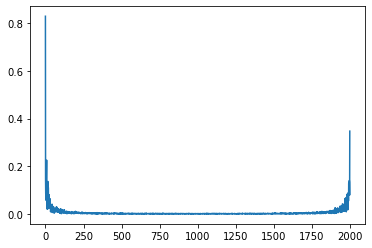

In [24]:
plt.plot(abs(Z)/max(Z))

In [25]:
Z_norm = abs(Z)
Z_norm = Z_norm/ max(Z_norm)

In [13]:
max_C =[]
max_D =[]
for i in range(len(C_new)):
    max_C.append(len(C_new[i]))
for i in range(len(D_new)):
    max_D.append(len(D_new[i]))
print(set(max_C))
print(set(max_D))

{1249, 999, 1999, 1749, 1499}
{1499, 1999}


In [27]:
L = len(Z_norm)+1
k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
N = 200
B  = 10*k ### chose the factor to be greater than (250/N), for overlap to exist
E =round((N*B - L)/(N-1))
step_size = B-E
bucket_size = B
bin_val=[]
for a in range(N-1):
    bin_val = np.append(bin_val, sum(np.abs(Z_norm[a*step_size:((a*step_size)+bucket_size)])))
    if (a == (N-2)):
        print(len(Z_norm),sum(np.abs(Z_norm[a*step_size:]))) 
            
binval = np.append(binval, sum(np.abs(Z_norm[-(bucket_size):])))
bin_val = bin_val/(max(bin_val))

1999 2.3071164755905835


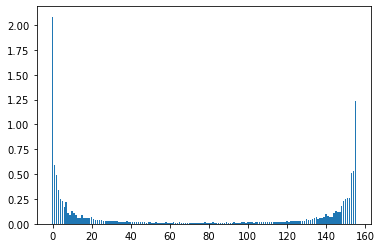

In [15]:
bin_xn = binval.tolist()
ht = bin_xn
ind = list(range(len(ht)))
plt.bar(ind, ht)
plt.show()

In [16]:
len(ind)

156

In [17]:
C_bins = []
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    L = len(Z_norm)+1
    k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
    N = 200
    B  = 10*k ### chose the factor to be greater than (250/N), for overlap to exist
    E =round((N*B - L)/(N-1))
    step_size = B-E
    bucket_size = B
    bin_val=[]
    for a in range(N-1):
        bin_val = np.append(bin_val, sum(np.abs(Z_norm[a*step_size:((a*step_size)+bucket_size)])))
        if (a == (N-2)):
            print(len(Z_norm),sum(np.abs(Z_norm[a*step_size:((a*step_size)+bucket_size)])))
    
    binval = np.append(binval, sum(np.abs(Z_norm[-(bucket_size):])))
    bin_val = bin_val/(max(bin_val))
    C_bins.append(bin_val.tolist())


1499 203552.88650975202
1999 5.425682480147572
1249 90706.56952197666
1999 18.62171638058598
1249 38076.098091048065
1249 11.251082289473889
1499 50647.59810605403
1499 2.356312839678857
1249 116361.9225130807
1499 3.8373840715509338
1499 88197.07218906992
1499 2.9436092533284612
1749 41681.78988357709
1249 6.426531730482131
1499 62835.04839724228
1499 1.271671764572115
1999 179127.9410781344
1499 2.191576804086856
1499 124580.56587437312
1499 0.8947445860056469
1499 119470.83484347843
1499 0.5705752678981497
1499 116781.5803176355
1249 1.8658118380396216
1499 231159.12703925648
1499 1.181402785298123
1499 46977.99482588115
1249 8.459443385122594
1499 33433.629746791696
999 7.005504030941239
1499 17766.41160150096
1499 17.010237179354643
1499 9430.62363939036
1499 23.95109185668647
1999 50550.56558596002
999 4.087155135578817
1499 29473.989344325662
1499 16.852584456901972
1999 20760.95709890193
1499 21.244453299873236
1999 30456.481307088565
1499 7.64094589325417
1499 18463.3738096994

,T,X,Y
0,0.0,0.000000,0.000000
1,20.0,0.327680,-0.327685
2,40.0,0.327680,-0.327685
3,60.0,0.327680,-0.327680
4,80.0,0.327685,0.000000
...,...,...,...
1994,39880.0,-49.480590,-24.903910
1995,39900.0,-44.893070,1.310915
1996,39920.0,-38.994830,9.830730
1997,39940.0,-36.701070,14.418295


In [82]:
D_bins = []
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    L = len(Z_norm)+1
    k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
    N = 200
    B  = 10*k
    E =round((N*B - L)/(N-1))
    step_size = B-E
    bucket_size = B
    bin_val=[]
    for a in range(N-1):
        bin_val = np.append(bin_val, sum((Z_norm[a*step_size:((a*step_size)+bucket_size)])))
    binval = np.append(binval, sum((Z_norm[-(bucket_size):])))
    bin_val = bin_val/(max(bin_val))
    D_bins.append(bin_val.tolist())

199
199
199
199
199
199
199
199
199
199


<function matplotlib.pyplot.show(*args, **kw)>

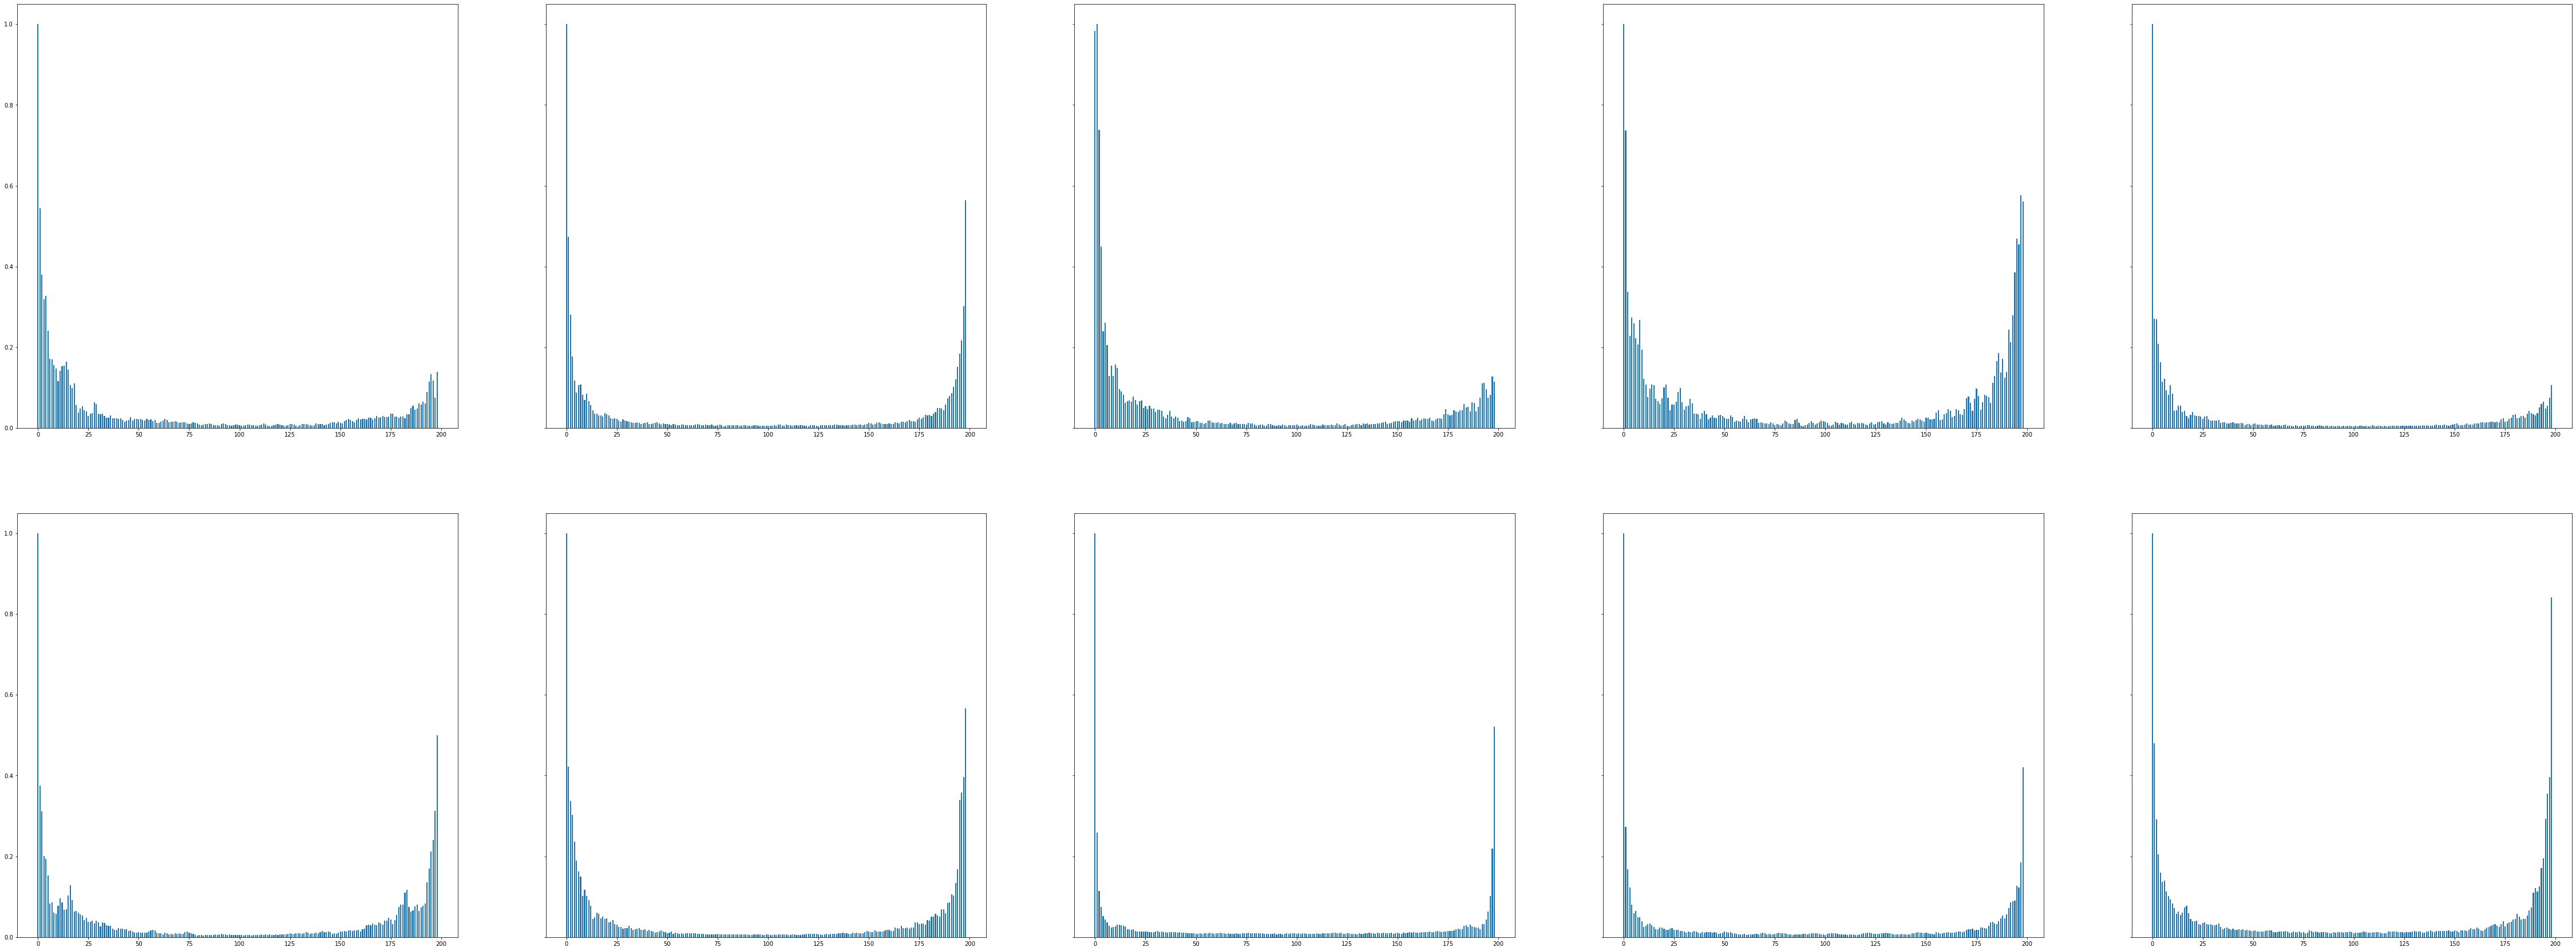

In [50]:
#FFT Normalized
fig,ax = plt.subplots(2,5, sharey= True, figsize = (80,30) )
for j in range(5):
    #print(len(C_new[j]))
    ht = C_bins[j]
    ind = list(range(len(ht)))
    print(len(ind))
    ax[0][j%5].bar(ind, ht, width=0.6)

for j in range(5):
    #print(len(D_new[j]))
    ht = D_bins[j]
    ind = list(range(len(ht)))
    print(len(ind))
    ax[1][j].bar(ind, ht, width=0.6)
    
plt.show

In [81]:
for i in range(4,9):
    N = 200
    L = 250*i
    B = 10*i
    E =(N*B - L)/(N-1)
    E = round(E)
    S = B - E
    g = [N,L,B,E,S]
    
    start = 198* S
    end = start+B
    nextg = L - B
    print(start,":", end, "|",nextg)
    print(g)

990 : 1030 | 960
[200, 1000, 40, 35, 5]
1188 : 1238 | 1200
[200, 1250, 50, 44, 6]
1386 : 1446 | 1440
[200, 1500, 60, 53, 7]
1584 : 1654 | 1680
[200, 1750, 70, 62, 8]
1980 : 2060 | 1920
[200, 2000, 80, 70, 10]


In [23]:
def return_sq_im(buckets):    
    matrix = np.empty([10,10])    
    for a in range(10):
        for b in range(10):
            m = buckets[a]
            n = buckets[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return img

In [31]:
final = []
for i in range(5):
    final.append(C_bins[i])
for i in range(5):
    final.append(D_bins[i])
len(final)

10

In [32]:
img = return_sq_im(final)

plt.imshow(img, cmap='gray', vmin=0, vmax=256)
plt.show()

ValueError: operands could not be broadcast together with shapes (213,) (199,) 